In [3]:
using Plots
gr()

Plots.GRBackend()

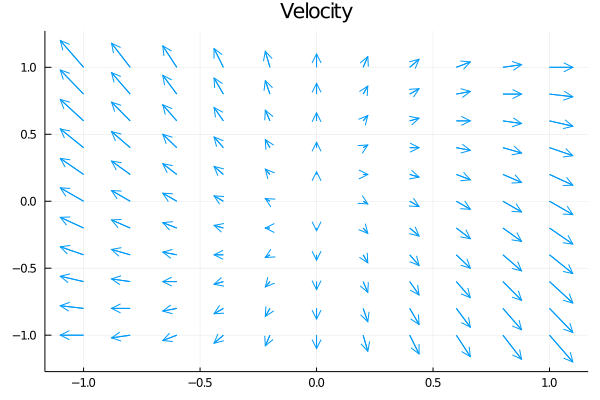

In [4]:
u(x,y)=x
v(x,y)=y-x
ω=-1
ucrossω1(x,y)=y-x
ucrossω2(x,y)=-x
∇ke1(x,y)=0.5*(4x-2y)
∇ke2(x,y)=0.5*(2y-2x)
DuDt1(x,y)=x
DuDt2(x,y)=-x+y-x
scalefactor=0.1
step=0.2
#Generate
X=[x for x in -1:step:1,y in -1:step:1][:]
Y=[y for x in -1:step:1,y in -1:step:1][:]
quiver(X,Y,quiver=(scalefactor*u.(X,Y),scalefactor*v.(X,Y)), title="Velocity")

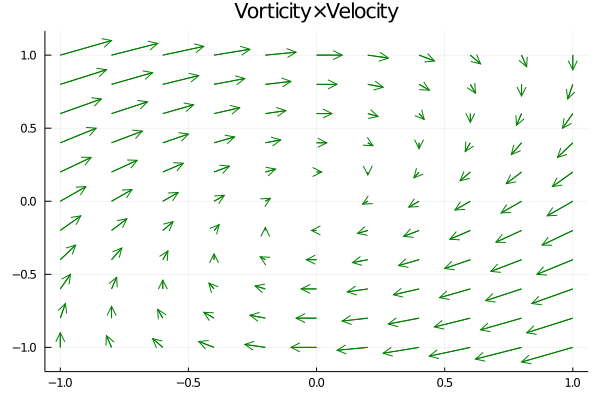

In [5]:
quiver(X,Y,quiver=(scalefactor*ucrossω1.(X,Y),scalefactor*ucrossω2.(X,Y)),title="Vorticity×Velocity",color="green")

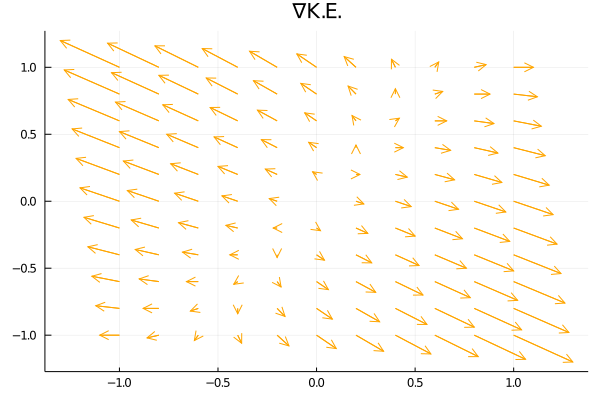

In [6]:
quiver(X,Y,quiver=(scalefactor*∇ke1.(X,Y),scalefactor*∇ke2.(X,Y)),title="∇K.E.",color="orange")

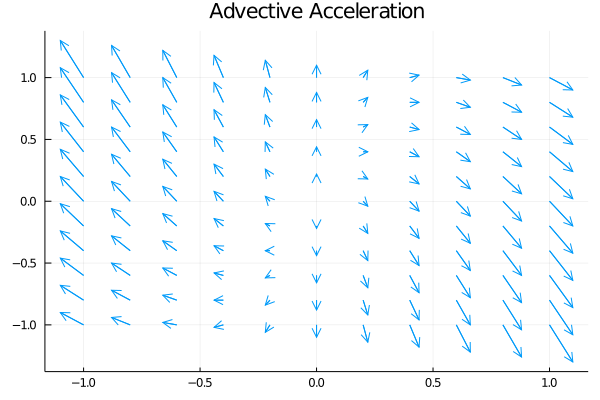

In [7]:
quiver(X,Y,quiver=(scalefactor*DuDt1.(X,Y),scalefactor*DuDt2.(X,Y)),title="Advective Acceleration")

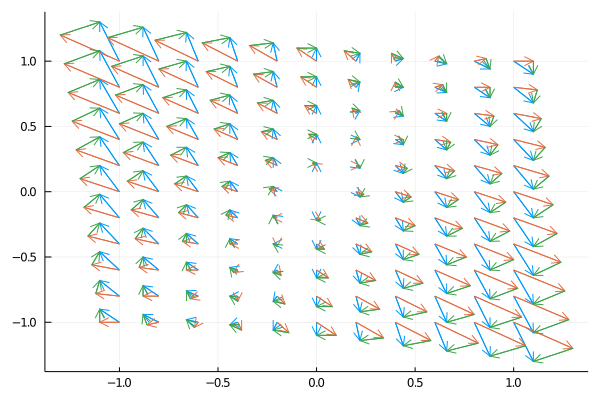

In [8]:
quiver(X,Y,quiver=(scalefactor*DuDt1.(X,Y),scalefactor*DuDt2.(X,Y)),label="Advective Acceleration")
quiver!(X,Y,quiver=(scalefactor*∇ke1.(X,Y),scalefactor*∇ke2.(X,Y)),label="∇K.E.")
quiver!(X+scalefactor*∇ke1.(X,Y),Y+scalefactor*∇ke2.(X,Y),quiver=(scalefactor*ucrossω1.(X,Y),scalefactor*ucrossω2.(X,Y)),label="Vorticity×Velocity+∇KE")

In [17]:
u(x,y,t)=x+cos(t)
v(x,y,t)=y-x+sin(t)
ω=-1
ucrossω1(x,y,t)=y-x+sin(t)
ucrossω2(x,y,t)=-x-cos(t)
∇ke1(x,y,t)=0.5*(2x+2cos(t)-2y-2sin(t))
∇ke2(x,y,t)=0.5*(2y-2x+2sin(t))
DuDt1(x,y,t)=x+cos(t)
DuDt2(x,y,t)=-x-cos(t)+y-x+sin(t)
scalefactor=0.1
step=0.2
#Generate
X=[x for x in -1:step:1,y in -1:step:1][:]
Y=[y for x in -1:step:1,y in -1:step:1][:];

┌ Info: Saved animation to 
│   fn = /Users/jerobinett/Desktop/JuliaPractice/tmp.gif
└ @ Plots /Users/jerobinett/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/jerobinett/Desktop/JuliaPractice/tmp.gif")
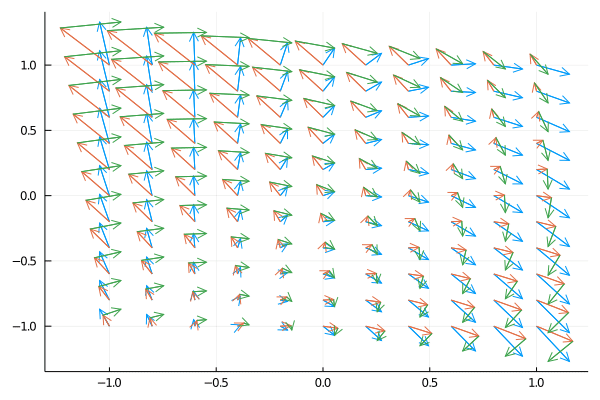

In [18]:
# initialize a plot with 1 empty series
plt = quiver(1,1, quiver=(1,1),
    xlim = (-1.25,1.25),
    ylim = (-1.25,1.25),
    title = "Velocity Vorticity Animation"
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for t = 1:0.1:12
    quiver([X X X+scalefactor*∇ke1.(X,Y,t)],[Y Y Y+scalefactor*∇ke2.(X,Y,t)], quiver=[(scalefactor*DuDt1.(X,Y,t),scalefactor*DuDt2.(X,Y,t)) (scalefactor*∇ke1.(X,Y,t),scalefactor*∇ke2.(X,Y,t)) (scalefactor*ucrossω1.(X,Y,t),scalefactor*ucrossω2.(X,Y,t))])
end

In [ ]:
g=9.8
u(x,z,t,k,a,H)=a*sqrt(g*k*tanh(k*H))*cosh(k*(z+H))*cos(k*x-sqrt(g*k*tanh(k*H))*t)/sinh(k*H)
w(x,z,t,k,a,H)=a*sqrt(g*k*tanh(k*H))*sinh(k*(z+H))*sin(k*x-sqrt(g*k*tanh(k*H))*t)/sinh(k*H)
scalefactor=0.01
amp=2
H=1000
k=0.5
xstep=4*π/k/12
ystep=(H+amp)/500
#Generate
X=[x for x in (-4*π/k):xstep:(4*π/k),y in -H:ystep:amp][:]
Z=[y for x in (-4*π/k):xstep:(4*π/k),y in -H:ystep:amp][:]
@gif for t = 1:0.1:30
    quiver(X,Z,quiver=(scalefactor*u.(X,Z,t,k,amp,H),scalefactor*w.(X,Z,t,k,amp,H)),xlim=((-4*π/k-1),(4*π/k+1)),ylim=(-5+1,amp+1))
end